In [3]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Brain Tumor.csv')
data = dataset.values

df = pd.DataFrame(dataset)

x = data[:, :14]
y = data[:, 14]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 14)
Dimensionalitat de l'atribut Y (3762,)


In [4]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.235,1208.850,34.769,0.064,2.082,4.647,158.438,0.221,0.049,0.487,5.212,0.951,0.000
3758,Image3759,0,20.435,1227.151,35.031,0.067,2.145,4.882,161.159,0.226,0.051,0.503,5.083,0.953,0.000
3759,Image3760,0,18.012,1151.583,33.935,0.068,2.308,5.579,167.130,0.229,0.052,0.492,5.104,0.952,0.000
3760,Image3761,0,13.330,945.733,30.753,0.088,2.733,7.758,223.813,0.262,0.068,0.480,6.440,0.941,0.000


0 = NO TUMOR  
1 = TUMOR

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [6]:
print("Per comptar el nombre de valors no existents:")
print(df.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


In [21]:
new_df= df.drop(['Coarseness'],axis=1)
new_df= new_df.drop(['Image'],axis=1)
new_df['Class'] = new_df['Class'].astype(float)
new_df.head()



,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,0.000,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982
1,0.000,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989
2,1.000,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978
3,1.000,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964
4,0.000,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973


<IPython.core.display.Javascript object>


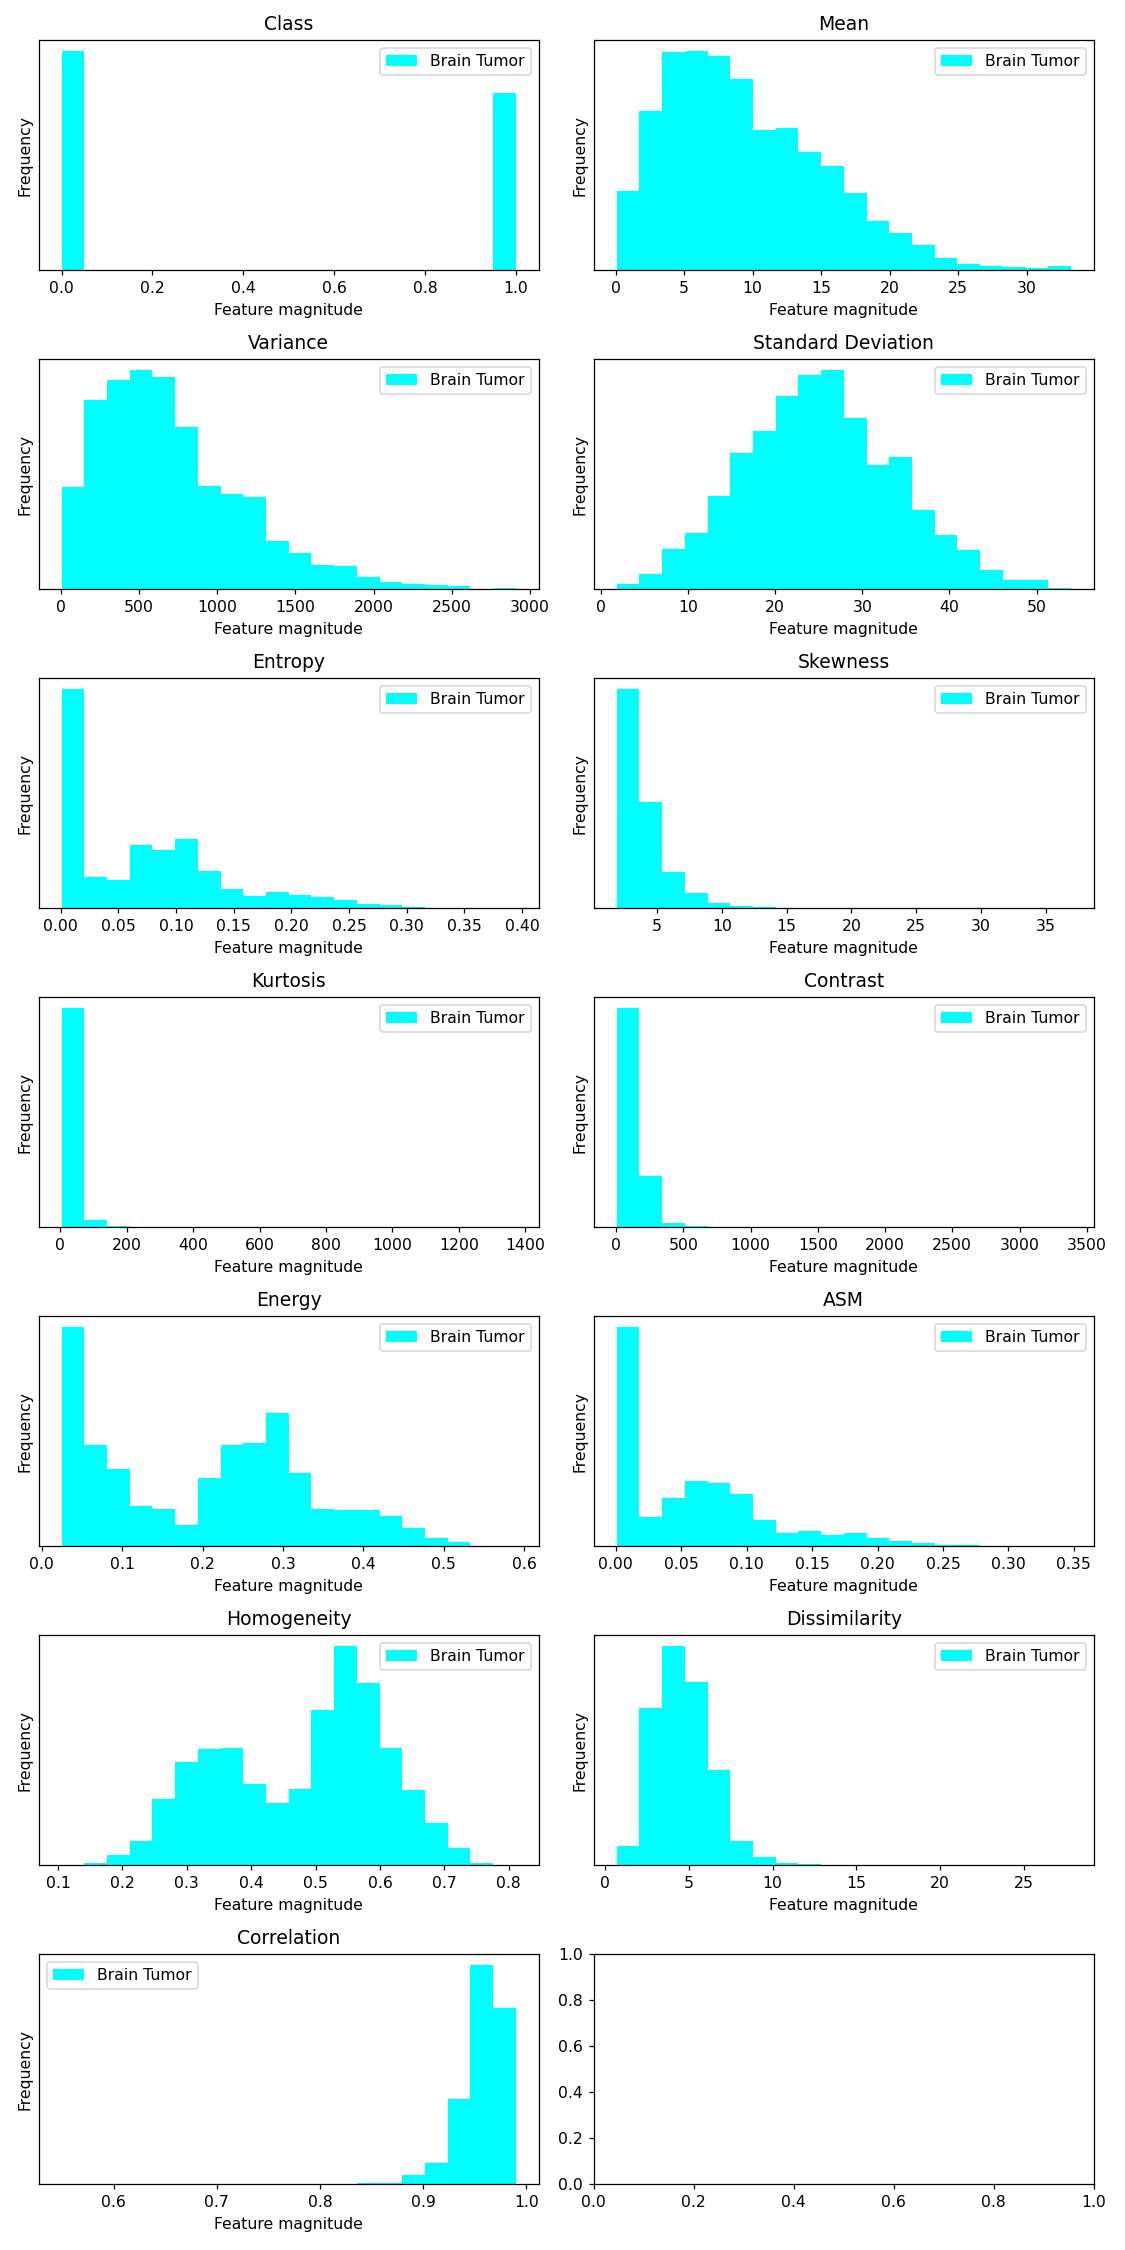

In [28]:
import mglearn 
fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()

for i in range(13):
    ax[i].hist(new_df.iloc[:,i], bins=20, color = 'cyan')
    ax[i].set_title(list(new_df)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["Brain Tumor"], loc="best")

fig.tight_layout()

In [27]:
tumor = df.loc[df['Class']==1]
no_tumor = df.loc[df['Class']==0]



fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()

for i in range(14):
    ax[i].hist(no_tumor.iloc[:,i], bins=20, color = 'cyan')
    ax[i].hist(tumor.iloc[:,i], bins=20, color = 'salmon')
    ax[i].set_title(list(df)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["no_tumor", "tumor"], loc="best")

fig.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


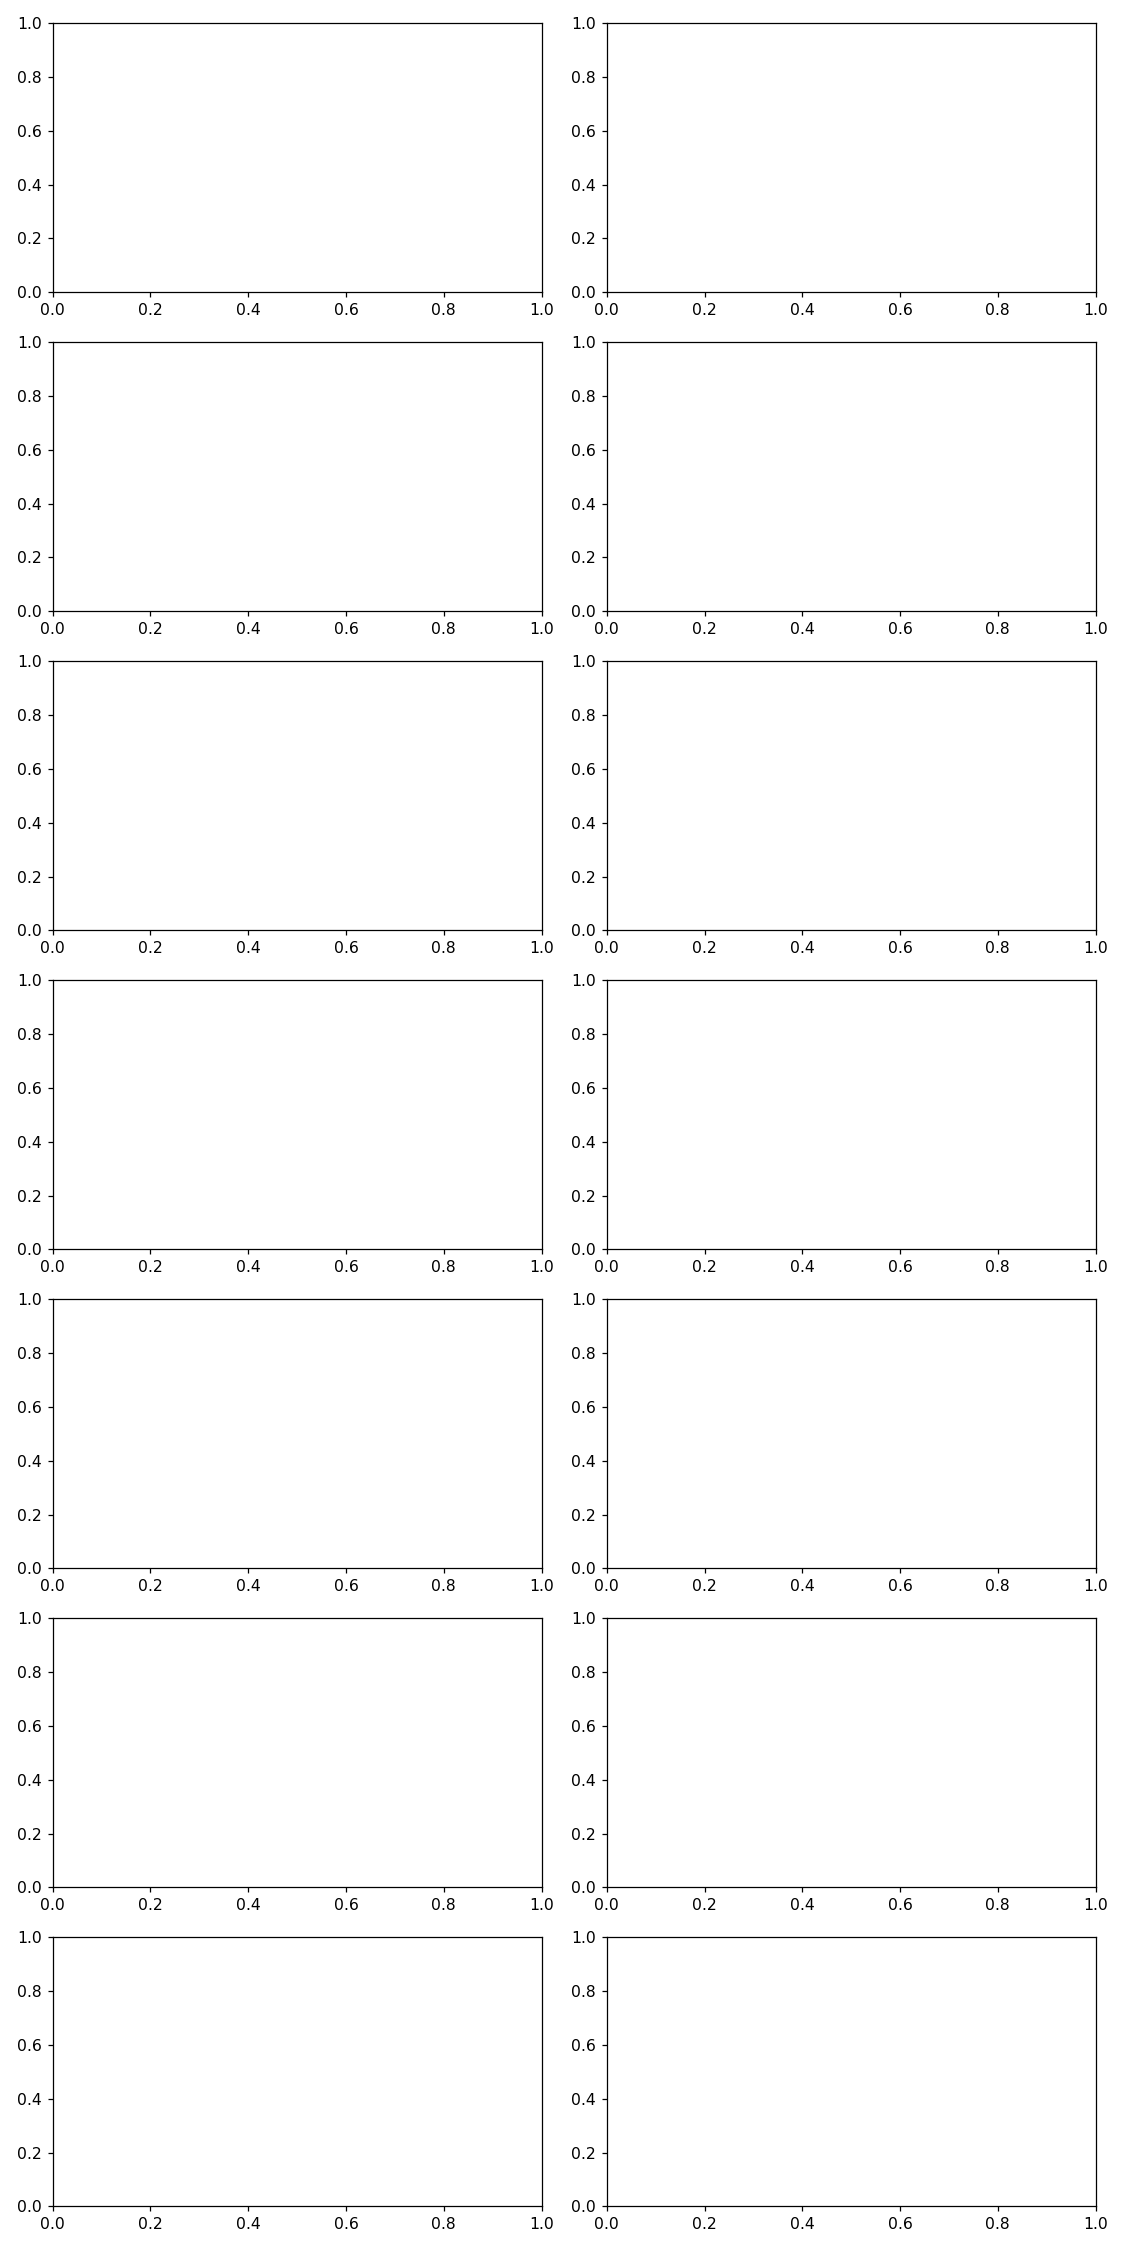

<IPython.core.display.Javascript object>


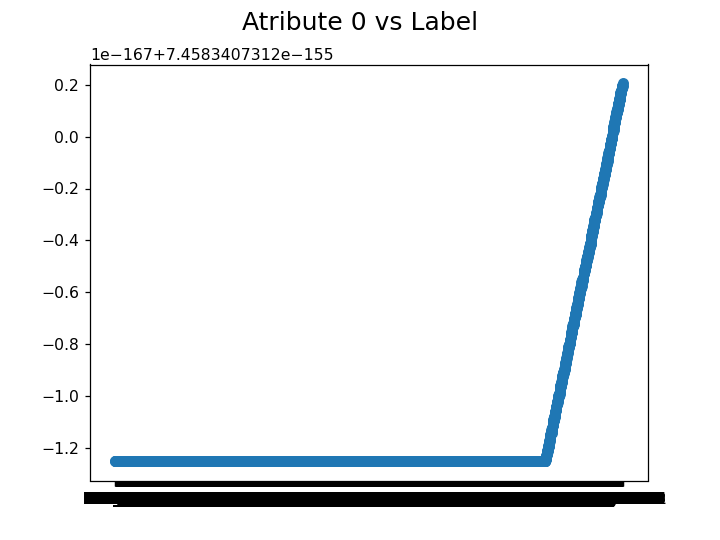

<IPython.core.display.Javascript object>


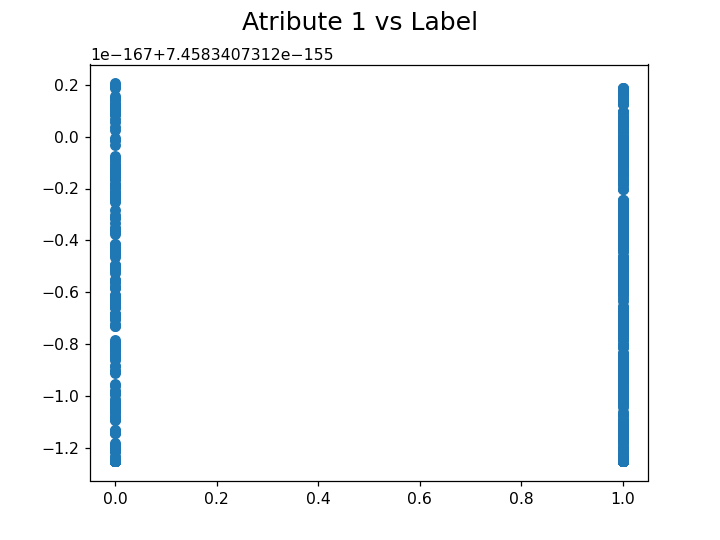

<IPython.core.display.Javascript object>


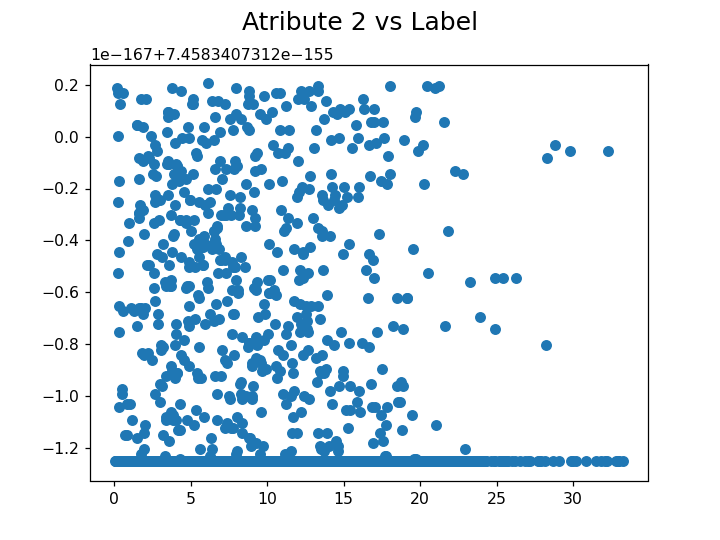

<IPython.core.display.Javascript object>


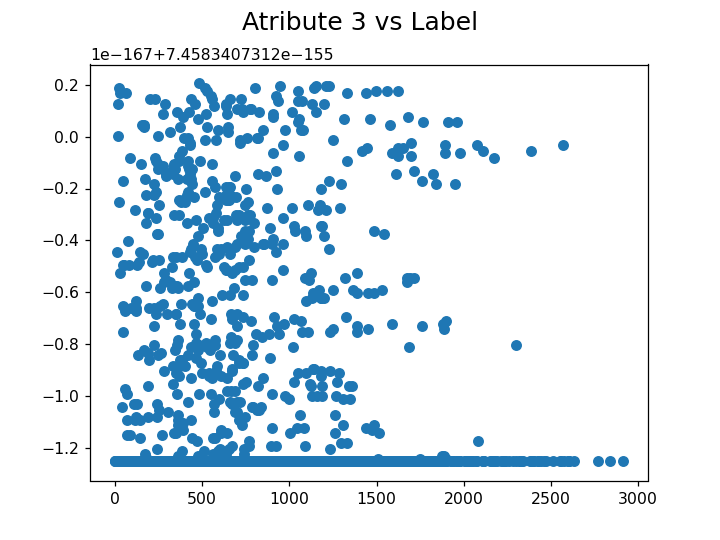

<IPython.core.display.Javascript object>


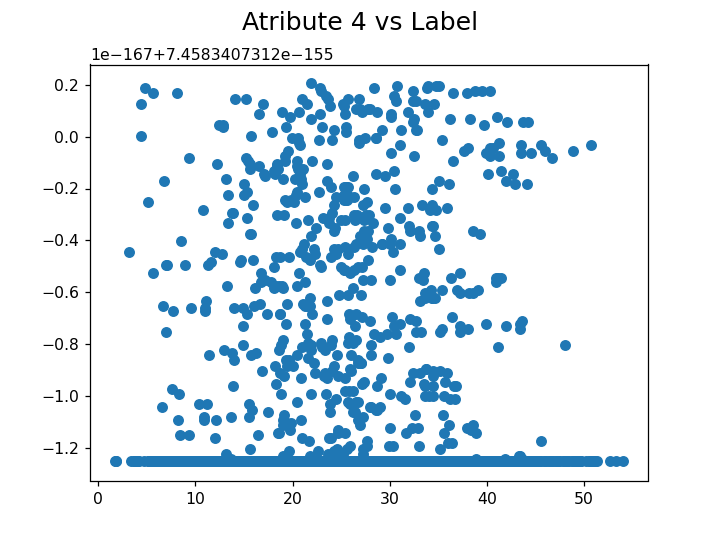

<IPython.core.display.Javascript object>


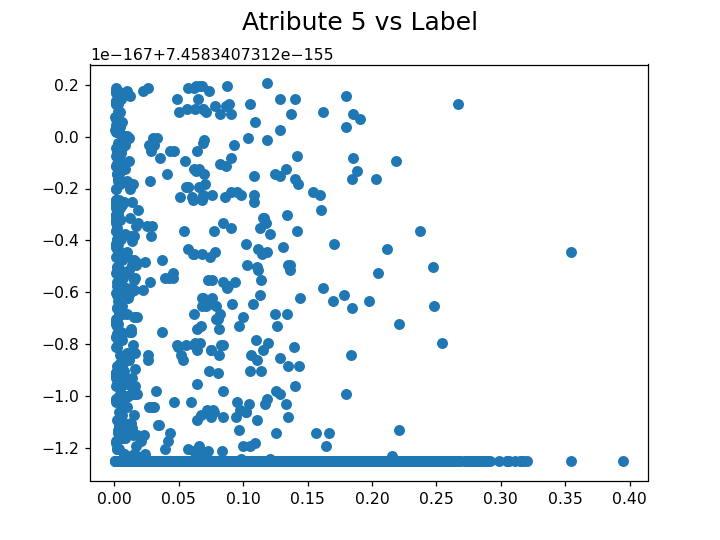

<IPython.core.display.Javascript object>


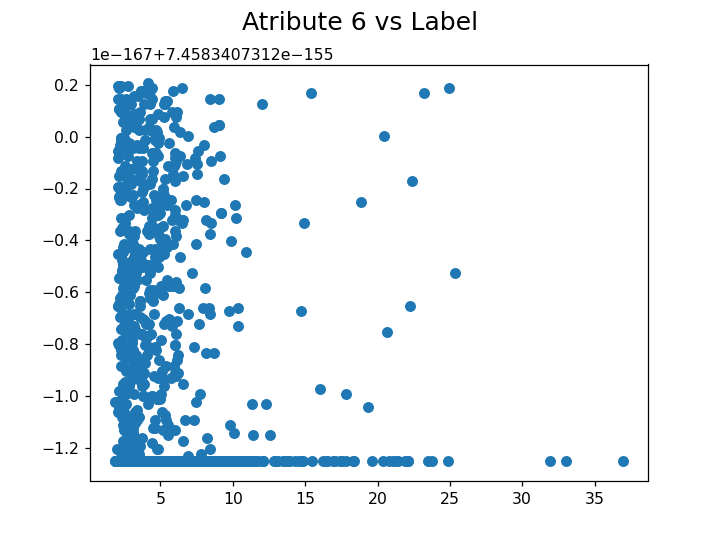

<IPython.core.display.Javascript object>


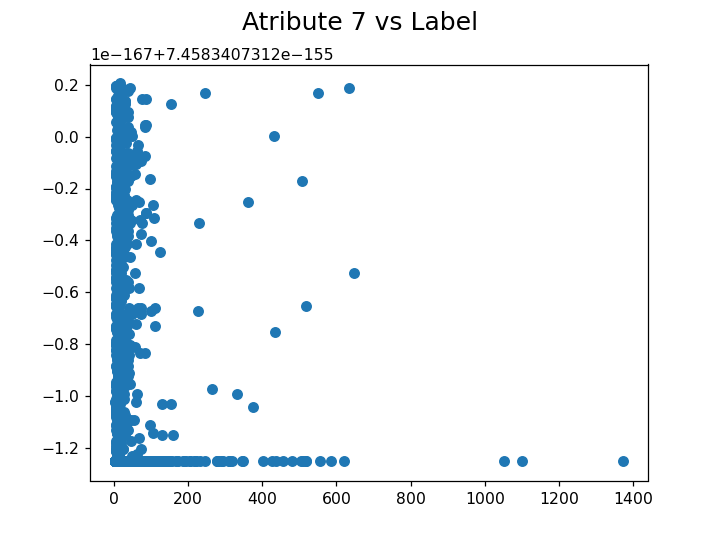

<IPython.core.display.Javascript object>


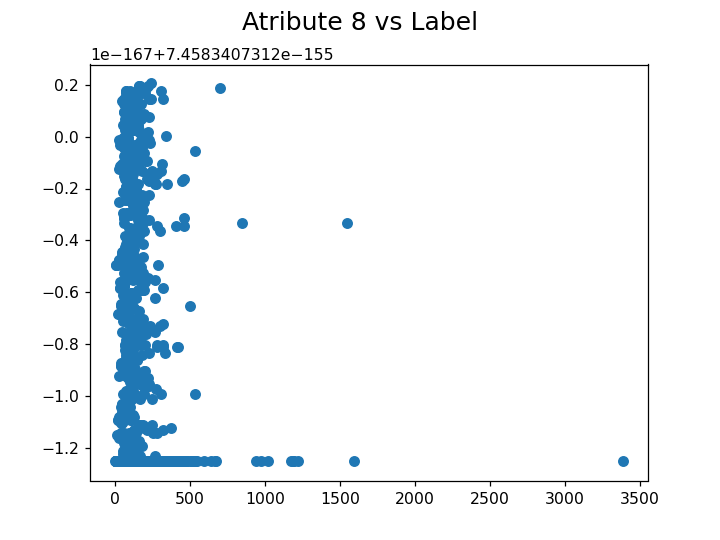

<IPython.core.display.Javascript object>


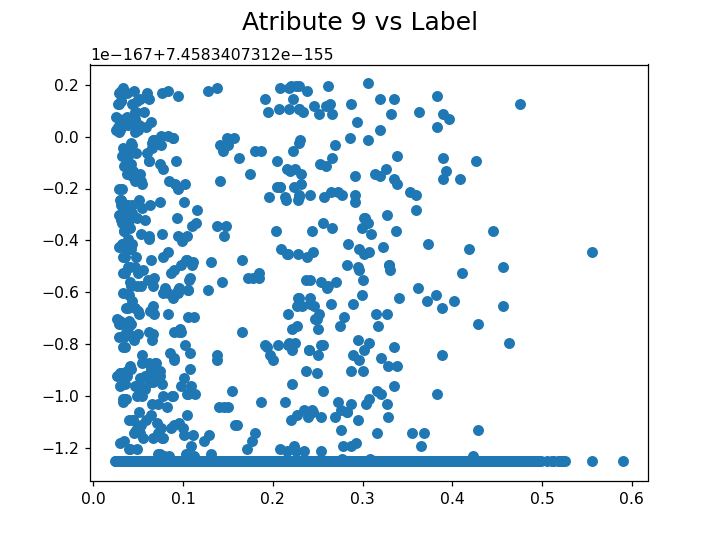

<IPython.core.display.Javascript object>


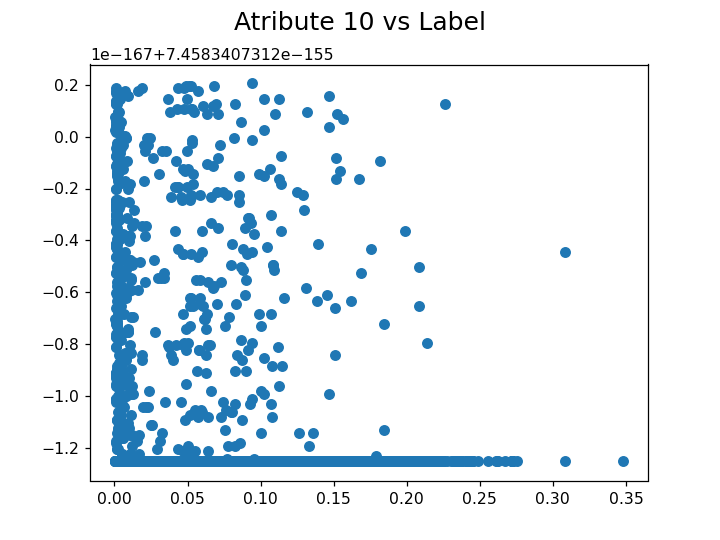

<IPython.core.display.Javascript object>


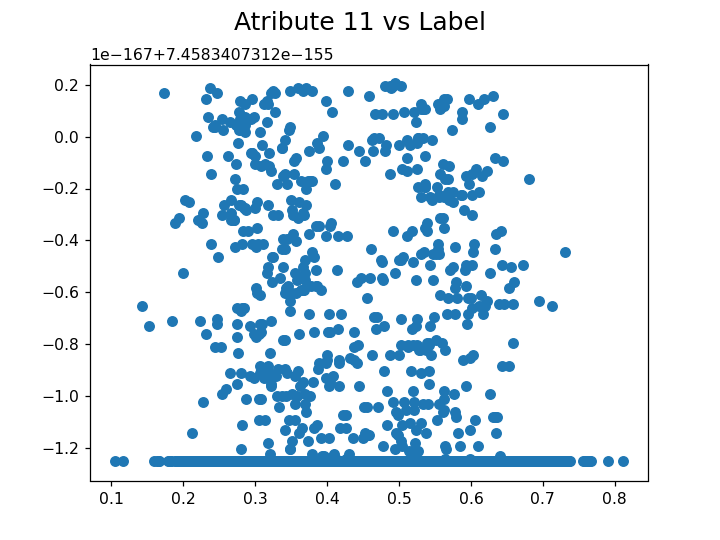

<IPython.core.display.Javascript object>


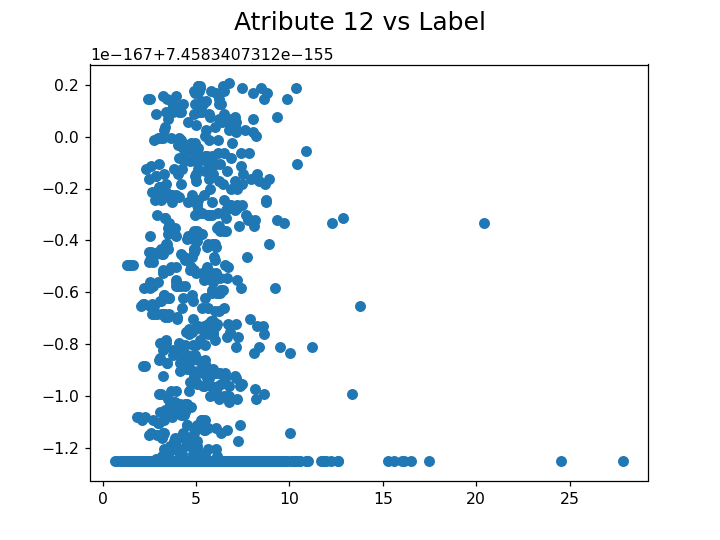

<IPython.core.display.Javascript object>


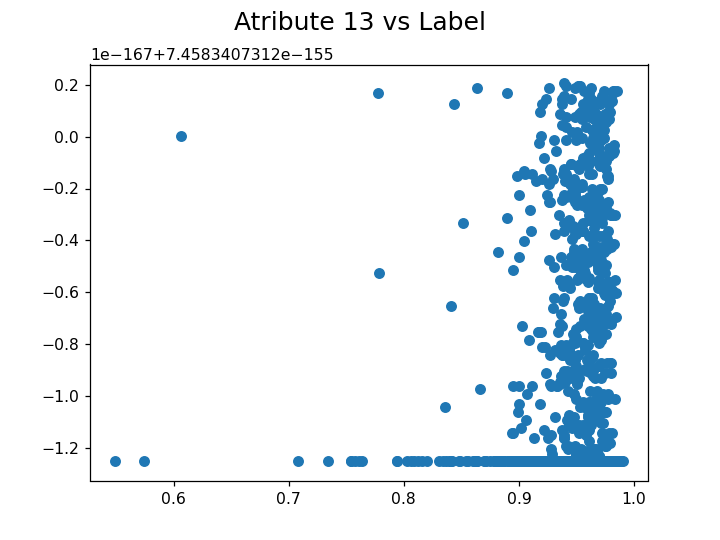

In [29]:
fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()
for i in range(14):
    plt.figure()
    plt.suptitle('Atribute '+ str(i) +' vs Label', fontsize=16)
    plt.scatter(x[:,i], y)

fig.tight_layout()

<IPython.core.display.Javascript object>


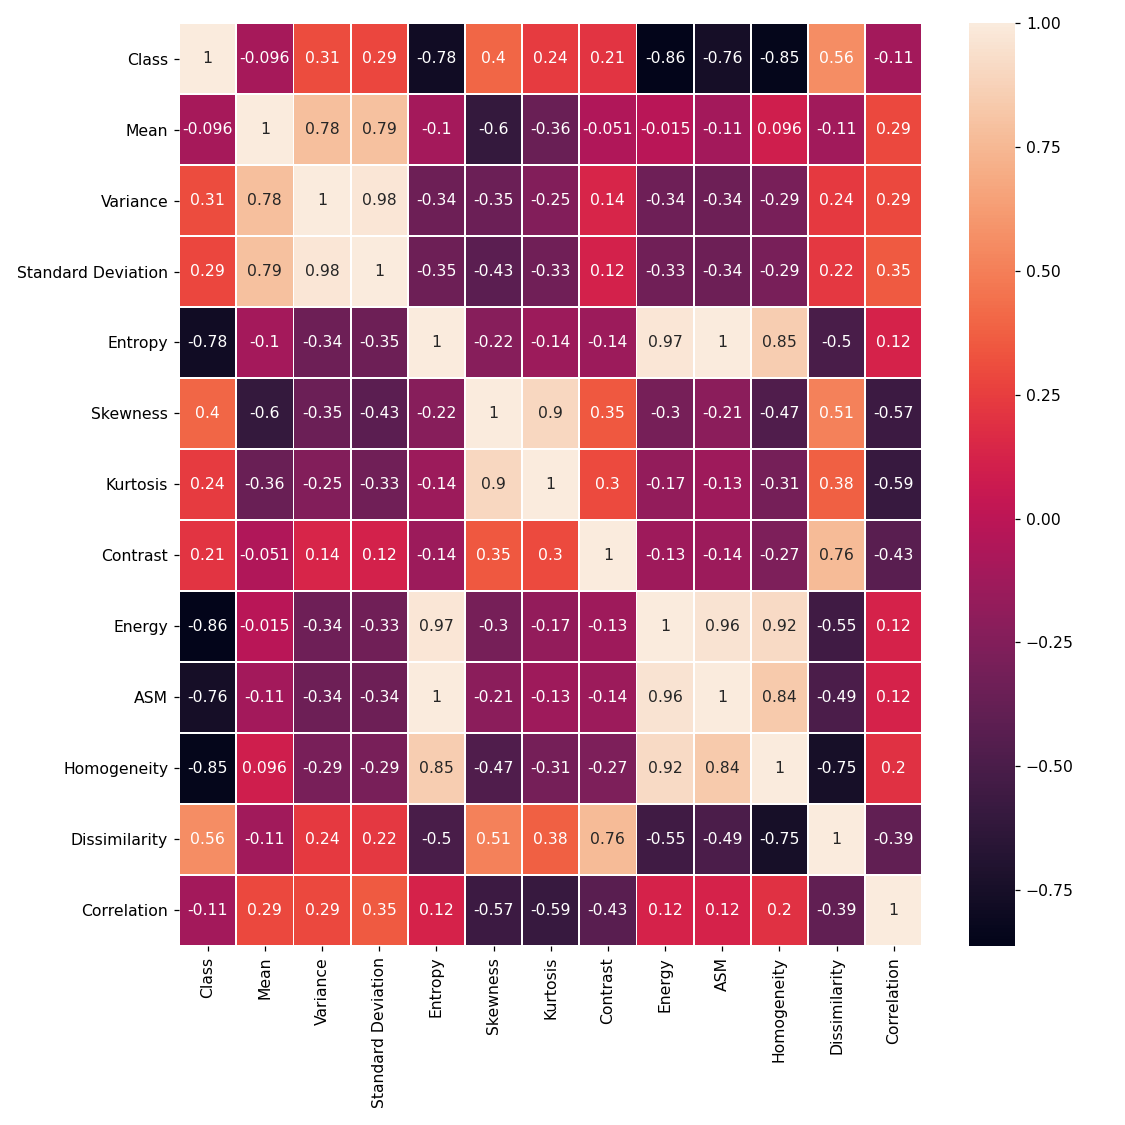

In [30]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = new_df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlacio, annot=True, linewidths=.5, ax=ax)

fig.tight_layout()

Entropy, Energy, ASM, Homogeneity, Dissimilarity

In [31]:
relacio = sns.pairplot(new_df)

<IPython.core.display.Javascript object>

In [32]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

mean_squeared_error([1,2,3,4], [1,2,1,4])

1.0

In [33]:
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')

vector1 = np.array([1,2,3,4]) # convertim llista de python a numpy array
vector2 = np.array([1,2,1,4]) 

# podem sumar dos vectors element a element
print("Suma vector1 + vector2 ", vector1 + vector2)

# podem sumar tots els valors d'un vector
print("Suma valors vector1 ", vector1.sum())

# calculem la mitjana
print("Mitjana vector1", vector1.mean())

# utilitzem un vector com a índex de l'altre
# vector3 = vector1  # necesitem fer una copia del vector per no modificar el original
vector3 = vector1.copy()
vector3[vector2 == 1] = 5
print("Vector1 amb un 5 on el Vector2 te 1s ", vector3)

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

print("MSE: ", mse(vector1, vector2))

Suma vector1 + vector2  [2 4 4 8]
Suma valors vector1  10
Mitjana vector1 2.5
Vector1 amb un 5 on el Vector2 te 1s  [5 2 5 4]
MSE:  1.0


In [34]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [65]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t
x = new_df.values[:,:12]
y = new_df.values[:,0]

x_t = standarize(x)


<IPython.core.display.Javascript object>


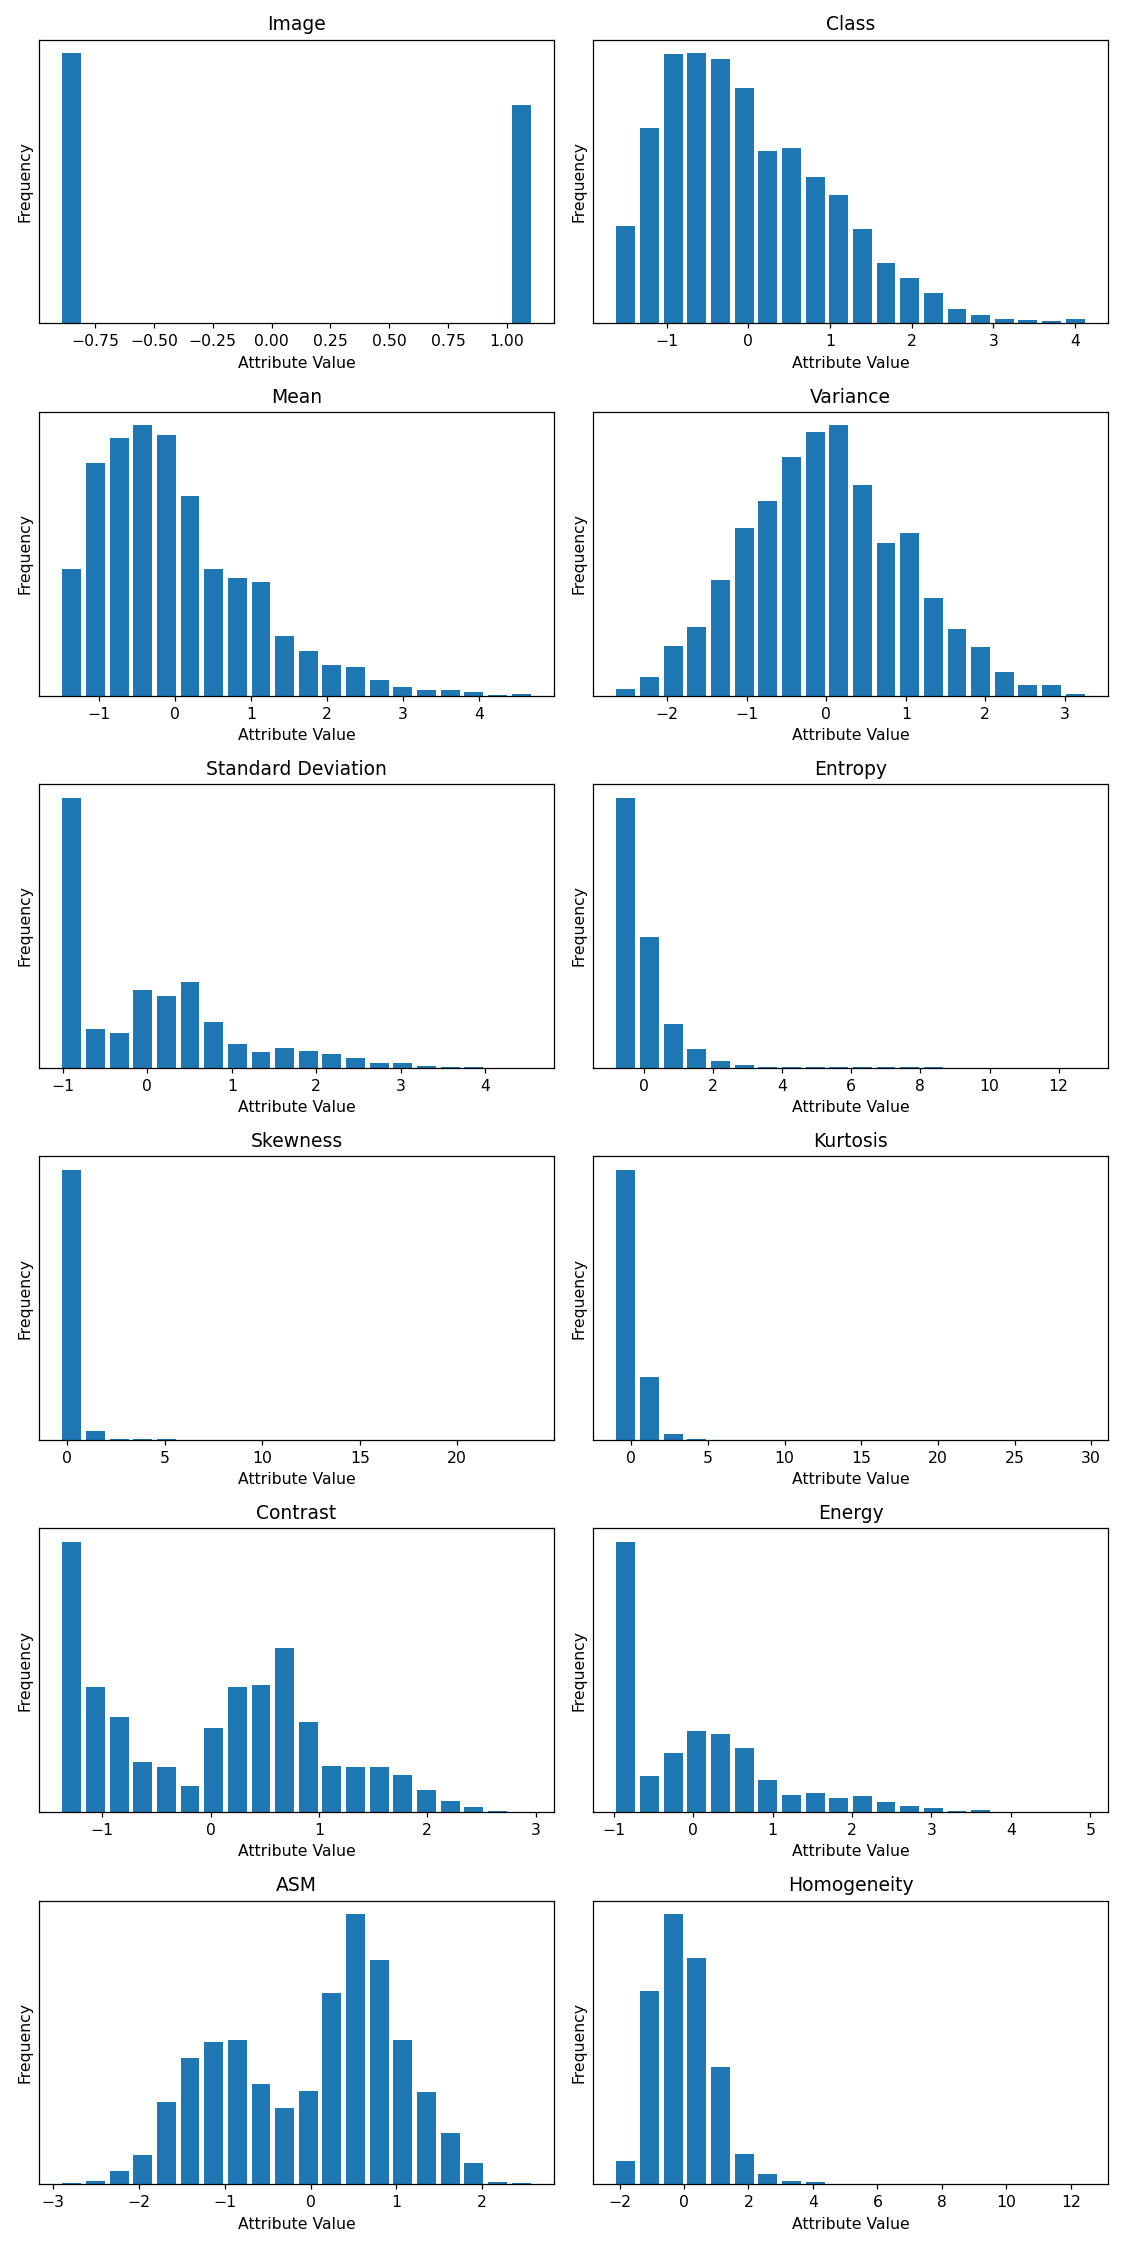

In [66]:
fig, axes = plt.subplots(6,2,figsize=(10,20))
ax = axes.ravel()

for i in range(12):
    
    ax[i].hist(x_t[:,i], bins=20, range=[np.min(x_t[:,i]), np.max(x_t[:,i])], histtype="bar", rwidth=0.8)
    ax[i].set_title(list(tumor)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Attribute Value")
    ax[i].set_ylabel("Frequency")
    

fig.tight_layout()

In [67]:
variables = ["Entropy", "Energy", "ASM","Homogeneity", "Dissimilarity"]
variablesIndex=[]
for i in range(len(variables)):
    variablesIndex.append(new_df.columns.get_loc(variables[i]))
variablesIndex

[4, 8, 9, 10, 11]

In [68]:
from sklearn.metrics import r2_score

# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.


predicted = []
for j,i in enumerate(variablesIndex):
    atribut2 = x[:,i].reshape(x.shape[0], 1) 
    regr = regression(atribut2, y) 
    predicted.append(regr.predict(atribut2))

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
# Mostrem l'error (MSE i R2)
for i in range(4):
    MSE = mse(y, predicted[i])
    r2 = r2_score(y, predicted[i])

    print("Mean squeared error attribute %s: %f" %(new_df.axes[1][variablesIndex[i]],MSE))
    print("R2 score: attribute %s: %f" %(new_df.axes[1][variablesIndex[i]],r2))
#accuracy multiple
i = 0
for pred in predicted:
    correcte = 0
    incorrecte = 0
    for labels,p in zip(y,pred):
        if((labels == 0 and p<0.5) or (labels == 1 and p>=0.5)):
            correcte +=1
        else:
            incorrecte +=1
    print("Fent servir l'atribut",new_df.axes[1][variablesIndex[i]],"obtenim un accuracy de",correcte/len(pred))
    i +=1


[0. 0. 1. ... 0. 0. 0.]
Mean squeared error attribute Entropy: 0.097516
R2 score: attribute Entropy: 0.605564
Mean squeared error attribute Energy: 0.063351
R2 score: attribute Energy: 0.743756
Mean squeared error attribute ASM: 0.105085
R2 score: attribute ASM: 0.574950
Mean squeared error attribute Homogeneity: 0.069643
R2 score: attribute Homogeneity: 0.718305
Fent servir l'atribut Entropy obtenim un accuracy de 0.93886230728336
Fent servir l'atribut Energy obtenim un accuracy de 0.9731525784157363
Fent servir l'atribut ASM obtenim un accuracy de 0.9292929292929293
Fent servir l'atribut Homogeneity obtenim un accuracy de 0.9481658692185008
Fent servir l'atribut Dissimilarity obtenim un accuracy de 0.776448697501329
